# Exploring Python Fast F1
*For full documentation on Fast F1, see https://theoehrly.github.io/Fast-F1/*

## 0 Setup environment
```
pip install -r requirements.txt
```

## 1 Get a session
Monaco 2021 - the Race
  
Find the winner based on the first result

In [30]:
import fastf1 as ff1
ff1.Cache.enable_cache('cache')  
session = ff1.get_session(2021, 'Monaco', 'R')
session.results[0]
driver = session.results[0]["Driver"]
f"{driver['givenName']} {driver['familyName']}"

'Max Verstappen'

Looks like Max won the race.

## 2 Get the fastest lap

In [31]:
laps = session.load_laps(with_telemetry=True)
fastest_lap = laps.pick_fastest()
fastest_lap

core           INFO 	Loading laps for Monaco Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['10', '44', '3', '5', '22', '99', '7', '11', '63', '16', '33', '55', '9', '6', '14', '47', '4', '18', '77', '31']


Time                      0 days 02:01:41.201000
DriverNumber                                  44
LapTime                   0 days 00:01:12.909000
LapNumber                                   69.0
Stint                                        3.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:19.179000
Sector2Time               0 days 00:00:34.041000
Sector3Time               0 days 00:00:19.689000
Sector1SessionTime        0 days 02:00:47.471000
Sector2SessionTime        0 days 02:01:21.512000
Sector3SessionTime        0 days 02:01:41.201000
SpeedI1                                    217.0
SpeedI2                                    200.0
SpeedFL                                    259.0
SpeedST                                    278.0
Compound                                    SOFT
TyreLife                                     6.0
FreshTyre                                  False
LapStartTime        

In [28]:
driver = session.get_driver(fastest_lap["Driver"]).info["Driver"]
f"{driver['givenName']} {driver['familyName']}"

'Lewis Hamilton'

But Hamilton got the fastest lap.

Let's look at that lap.

## 3 Get lap 
Let's get the lap telemetry.

In [3]:
telemetry = fastest_lap.get_telemetry()
telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2021-05-23 14:30:29.055,0 days 02:00:28.292000,,1038.809722,0 days 00:00:00,10644,260,7,100,0,0,interpolation,0.001407,4.287940e-07,OnTrack,-7656,-6691,499
3,2021-05-23 14:30:29.198,0 days 02:00:28.435000,,1038.809722,0 days 00:00:00.143000,10651,260,7,100,0,0,pos,10.371030,3.161324e-03,OnTrack,-7663,-6589,502
4,2021-05-23 14:30:29.241,0 days 02:00:28.478000,,1038.809722,0 days 00:00:00.186000,10664,261,7,100,0,0,car,13.500000,4.115105e-03,OnTrack,-7664,-6557,502
5,2021-05-23 14:30:29.418,0 days 02:00:28.655000,,1038.809722,0 days 00:00:00.363000,10675,262,7,100,0,0,pos,26.427401,8.055668e-03,OnTrack,-7673,-6429,503
6,2021-05-23 14:30:29.481,0 days 02:00:28.718000,10,1038.809722,0 days 00:00:00.426000,10687,263,7,100,0,0,car,31.033333,9.459661e-03,OnTrack,-7675,-6383,503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,2021-05-23 14:31:41.522,0 days 02:01:40.759000,10,928.322500,0 days 00:01:12.467000,10580,258,7,100,0,0,car,3245.670278,9.893536e-01,OnTrack,-7633,-7021,502
634,2021-05-23 14:31:41.578,0 days 02:01:40.815000,10,924.089167,0 days 00:01:12.523000,10629,259,7,100,0,0,pos,3249.710723,9.905852e-01,OnTrack,-7637,-6981,502
635,2021-05-23 14:31:41.762,0 days 02:01:40.999000,10,919.855833,0 days 00:01:12.707000,10679,261,7,100,0,0,car,3263.070278,9.946575e-01,OnTrack,-7647,-6847,501
636,2021-05-23 14:31:41.798,0 days 02:01:41.035000,10,919.855833,0 days 00:01:12.743000,10742,262,7,100,0,0,pos,3265.697846,9.954584e-01,OnTrack,-7649,-6821,502


Now lets visualise the lap speed.

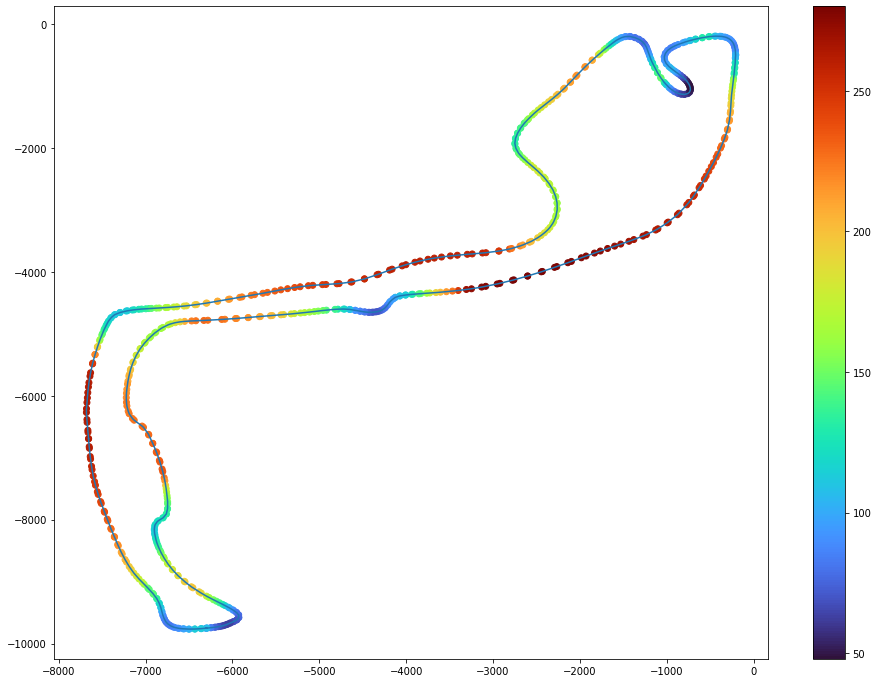

In [55]:
import matplotlib.pyplot as plt

x = telemetry["X"]
y = telemetry["Y"]
v = telemetry["Speed"]

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot()
line = ax.plot(x,y)
sc = ax.scatter(x, y, c=v, cmap='turbo')
fig.colorbar(sc, ax=ax)

Monaco is pretty hilly, so lets look at that in 3D

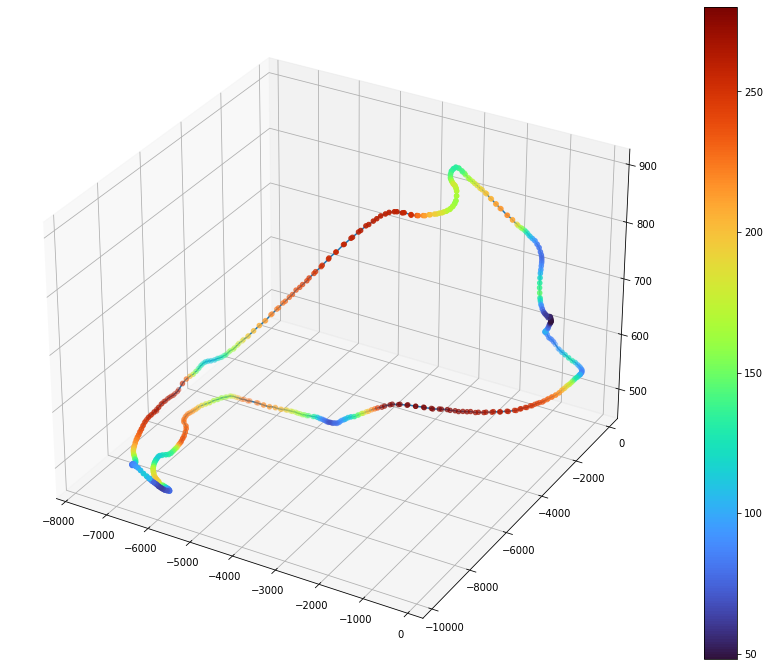

In [46]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,12))
ax = plt.axes(projection='3d')

x = telemetry["X"]
y = telemetry["Y"]
z = telemetry["Z"]
v = telemetry["Speed"]

ax.plot3D(x, y, z)
ax.scatter3D(x, y, z, c=v, cmap='turbo')
fig.colorbar(sc, ax=ax)

## 4 Looking for patterns of behaviour
Lets start by looking at speed by distance for the fastest lap

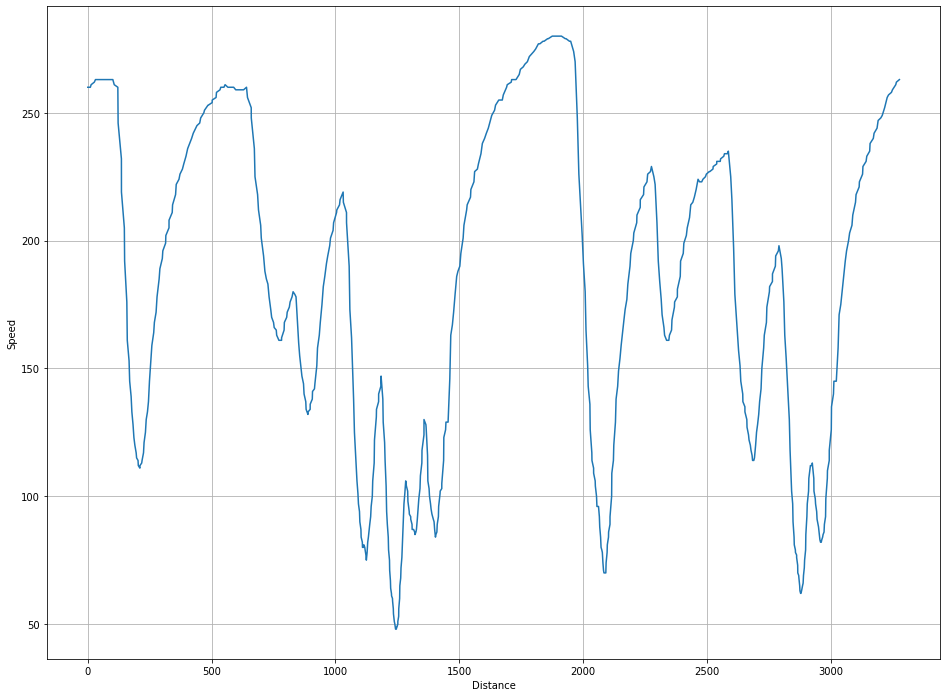

In [52]:
import matplotlib.pyplot as plt

d = telemetry["Distance"]
v = telemetry["Speed"]

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot()
line = ax.plot(d,v)
ax.set_xlabel("Distance")
ax.set_ylabel("Speed")
ax.grid(visible=True)

Now lets get all of Lewis Hamilton's laps

In [61]:
ham_laps = laps.pick_driver("HAM")
ham_laps

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,SpeedST,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
343,0 days 00:34:22.818000,44,NaT,1.0,1.0,0 days 00:00:04.827000,NaT,NaT,0 days 00:00:38.253000,0 days 00:00:21.595000,...,275.0,SOFT,5.0,False,0 days 00:32:54.677000,Mercedes,HAM,1,False,2021-05-23 13:02:55.440
344,0 days 00:35:41.560000,44,0 days 00:01:18.742000,2.0,1.0,NaT,NaT,0 days 00:00:20.906000,0 days 00:00:36.588000,0 days 00:00:21.248000,...,281.0,SOFT,6.0,False,0 days 00:34:22.818000,Mercedes,HAM,1,True,2021-05-23 13:04:23.581
345,0 days 00:36:59.800000,44,0 days 00:01:18.240000,3.0,1.0,NaT,NaT,0 days 00:00:20.900000,0 days 00:00:36.355000,0 days 00:00:20.985000,...,276.0,SOFT,7.0,False,0 days 00:35:41.560000,Mercedes,HAM,1,True,2021-05-23 13:05:42.323
346,0 days 00:38:17.736000,44,0 days 00:01:17.936000,4.0,1.0,NaT,NaT,0 days 00:00:20.584000,0 days 00:00:36.367000,0 days 00:00:20.985000,...,275.0,SOFT,8.0,False,0 days 00:36:59.800000,Mercedes,HAM,1,True,2021-05-23 13:07:00.563
347,0 days 00:39:35.957000,44,0 days 00:01:18.221000,5.0,1.0,NaT,NaT,0 days 00:00:20.710000,0 days 00:00:36.260000,0 days 00:00:21.251000,...,273.0,SOFT,9.0,False,0 days 00:38:17.736000,Mercedes,HAM,1,True,2021-05-23 13:08:18.499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,0 days 02:07:54.500000,44,0 days 00:01:15.323000,74.0,3.0,NaT,NaT,0 days 00:00:19.680000,0 days 00:00:35.163000,0 days 00:00:20.480000,...,284.0,SOFT,11.0,False,0 days 02:06:39.177000,Mercedes,HAM,1,True,2021-05-23 14:36:39.940
417,0 days 02:09:11.295000,44,0 days 00:01:16.795000,75.0,3.0,NaT,NaT,0 days 00:00:19.762000,0 days 00:00:35.457000,0 days 00:00:21.576000,...,280.0,SOFT,12.0,False,0 days 02:07:54.500000,Mercedes,HAM,1,True,2021-05-23 14:37:55.263
418,0 days 02:10:25.834000,44,0 days 00:01:14.539000,76.0,3.0,NaT,NaT,0 days 00:00:19.217000,0 days 00:00:34.883000,0 days 00:00:20.439000,...,280.0,SOFT,13.0,False,0 days 02:09:11.295000,Mercedes,HAM,1,True,2021-05-23 14:39:12.058
419,0 days 02:11:41.884000,44,0 days 00:01:16.050000,77.0,3.0,NaT,NaT,0 days 00:00:19.899000,0 days 00:00:35.537000,0 days 00:00:20.614000,...,280.0,SOFT,14.0,False,0 days 02:10:25.834000,Mercedes,HAM,1,True,2021-05-23 14:40:26.597


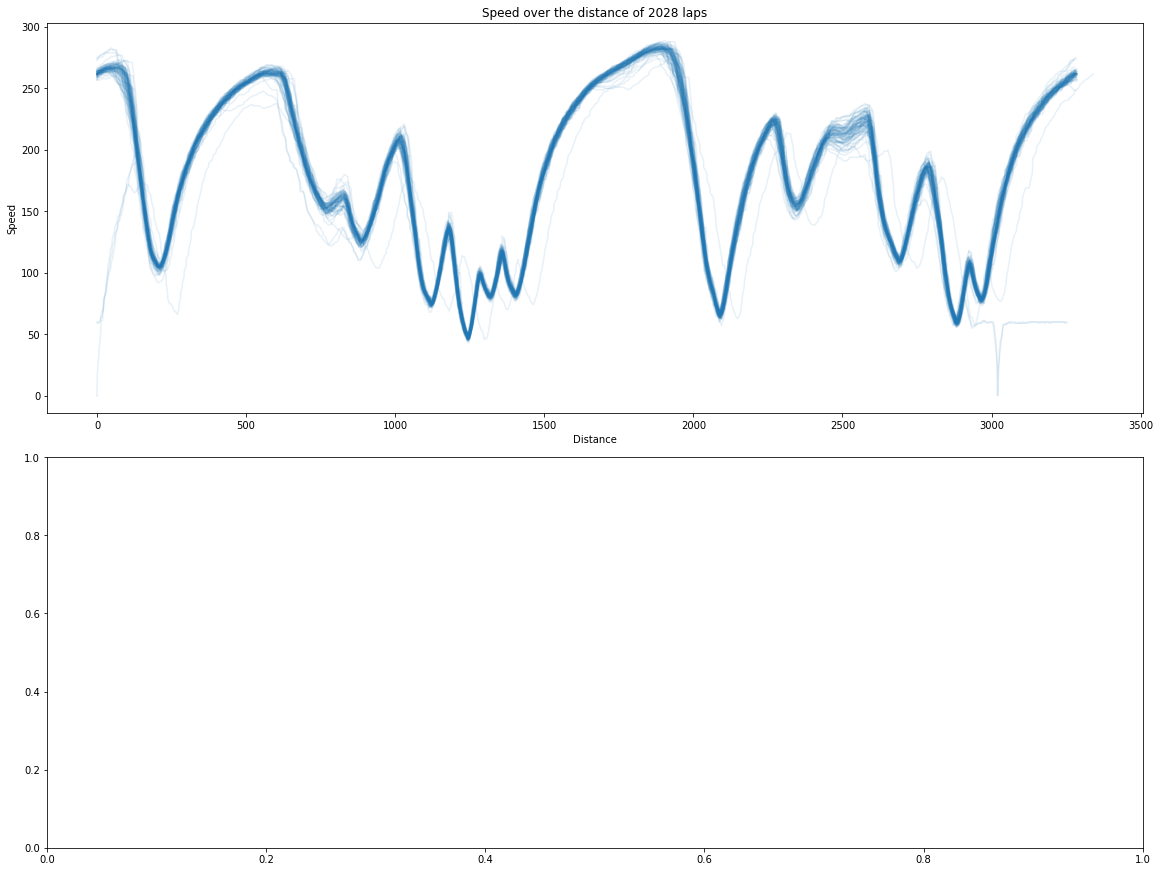

In [74]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, figsize=(16, 12), constrained_layout=True)

axes[0].set_title(f"Speed over the distance of {ham_laps.size} laps")
axes[0].set_xlabel("Distance")
axes[0].set_ylabel("Speed")

for index, lap in ham_laps.iterlaps():
    t = lap.get_telemetry()
    axes[0].plot(t["Distance"], t["Speed"], color="C0", alpha=0.1)
    